In [12]:
!pip install roboflow

In [13]:
from roboflow import Roboflow
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2

In [20]:
# Substitua pela sua chave de API do Roboflow
API_KEY = "xxxxxxxxxxxx"

In [15]:
# Dicionário para mapear classes a cores
cores_por_classe = {
    "Fishing net": (0, 0, 128),  # Azul escuro
    "aluminum can": (135, 206, 250),  # Azul claro
    "bottle": (128, 0, 128),  # Roxo
    "plastic bag": (255, 165, 0),  # Laranja
    "plastic waste": (255, 0, 0),  # Vermelho
    "tire": (0, 128, 0)  # Verde
}

In [21]:
def identificar_objetos(imagem):
  rf = Roboflow(api_key=API_KEY)
  project = rf.workspace("reconhecimentoimgs").project("global-solution")
  model = project.version(4).model

  # Salva a imagem em um arquivo temporário
  temp_image_path = "temp_image.jpg"
  imagem.save(temp_image_path)

  # Realiza a inferência usando o caminho da imagem
  prediction = model.predict(temp_image_path, confidence=40, overlap=30)

  # Carrega a imagem usando PIL
  imagem = Image.open(temp_image_path)
  imagem = np.array(imagem)

  # Desenha as bounding boxes e informações na imagem
  for predicao in prediction:
    confianca = predicao['confidence']

    # Verifica se a confiança é maior que 0.6 (60%)
    if confianca > 0.6:
      x1 = int(predicao['x'] - predicao['width'] / 2)
      y1 = int(predicao['y'] - predicao['height'] / 2)
      x2 = int(x1 + predicao['width'])
      y2 = int(y1 + predicao['height'])
      classe = predicao['class']

      # Obtém a cor para a classe
      cor = cores_por_classe.get(classe, (0, 0, 0)) # Cor padrão: preto se a classe não estiver no dicionário

      # Desenha o retângulo com a cor da classe
      imagem = cv2.rectangle(imagem, (x1, y1), (x2, y2), cor, 2)

      # Adiciona o texto com a classe e confiança
      texto = f"{classe}: {confianca:.2f}"
      cv2.putText(imagem, texto, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

  return imagem


In [24]:
# Faz o upload da imagem pelo usuário
uploaded = files.upload()


Saving imagem_teste.jpg to imagem_teste.jpg


In [25]:
# Obtém o nome da primeira imagem carregada
nome_imagem = next(iter(uploaded))
imagem = Image.open(io.BytesIO(uploaded[nome_imagem]))


loading Roboflow workspace...
loading Roboflow project...


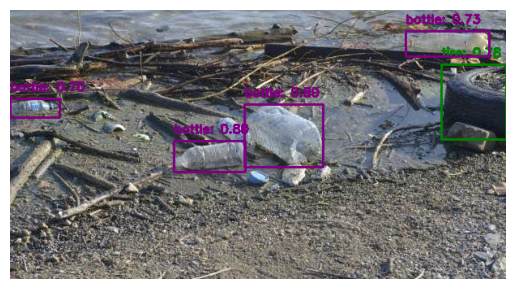

In [26]:
# Realiza a identificação dos objetos na imagem
imagem_com_deteccoes = identificar_objetos(imagem)

# Exibe a imagem com as detecções
plt.imshow(imagem_com_deteccoes)
plt.axis('off')
plt.show()